In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [102]:
df = pd.read_csv('C:/Users/Abdelrahman/Documents/Machine Learning/linear regression/08-Linear-Regression-Models/Advertising.csv')

In [103]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [104]:
x = df.drop('sales',axis=1)

In [105]:
y = df['sales']

In [106]:
train_rmse_errors = []
test_rmse_errors = []

In [107]:
for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(x)
    x_train,x_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.3,random_state=101)
    model = LinearRegression(fit_intercept=True)
    model.fit(x_train,y_train)
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    train_rmse = np.sqrt(mean_squared_error(y_train,pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test,pred_test))
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

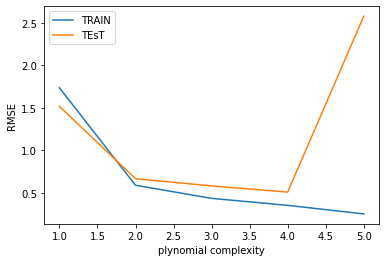

In [108]:
plt.plot(range(1,6) , train_rmse_errors[:5] , label='TRAIN')
plt.plot(range(1,6) , test_rmse_errors[:5] , label='TEsT')
plt.xlabel("plynomial complexity")
plt.ylabel("RMSE")
plt.legend()

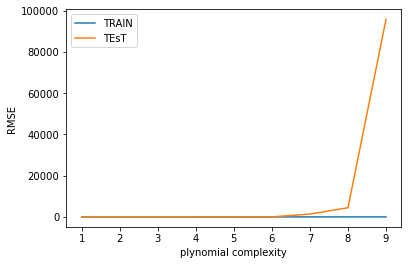

In [109]:
plt.plot(range(1,10) , train_rmse_errors , label='TRAIN')
plt.plot(range(1,10) , test_rmse_errors , label='TEsT')
plt.xlabel("plynomial complexity")
plt.ylabel("RMSE")
plt.legend()

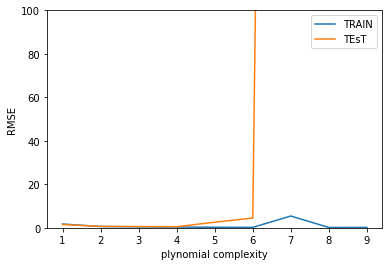

In [110]:
plt.plot(range(1,10) , train_rmse_errors , label='TRAIN')
plt.plot(range(1,10) , test_rmse_errors , label='TEsT')
plt.xlabel("plynomial complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

In [111]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [112]:
final_model = LinearRegression()

In [113]:
final_model.fit(final_poly_converter.fit_transform(x),y)

LinearRegression()

In [118]:
from joblib import dump,load

In [120]:
dump(final_model,'sales_poly_model.joblib')

['sales_poly_model.joblib']

In [121]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [123]:
loaded_poly  = load("poly_converter.joblib")
loaded_model = load('sales_poly_model.joblib')

In [124]:
camp = [[149,22,12]]

In [126]:
camp_poly = loaded_poly.transform(camp)

In [127]:
camp_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [128]:
final_model.predict(camp_poly)

array([14.64501014])